In [1]:
!kaggle competitions download -c fashion-mnist-itba-lab-2020

fashion-mnist-itba-lab-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import pandas as pd
from zipfile import ZipFile
import tensorflow
import numpy as np

# pass in the specific file name 
# to the open method
with ZipFile("fashion-mnist-itba-lab-2020.zip") as myzip:
    data = myzip.open("train_labels.csv")
    images = myzip.open("train_images.npy")
    test = myzip.open("test_images.npy")

#Now, we can read in the data


x = np.load(images)
x_test = np.load(test)
y = np.loadtxt(data, delimiter=',', skiprows=1)

In [57]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import math


In [8]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [9]:
import pandas as pd
from zipfile import ZipFile



# pass in the specific file name 
# to the open method
with ZipFile("fashion-mnist-itba-lab-2020.zip") as myzip:
    data = myzip.open("train_labels.csv")
    images = myzip.open("train_images.npy")
    test = myzip.open("test_images.npy")

#Now, we can read in the data


x = np.load(images)
x_test = np.load(test)
y = np.loadtxt(data, delimiter=',', skiprows=1)

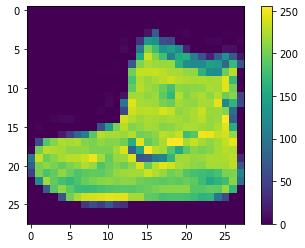

In [10]:
plt.figure()
plt.imshow(x[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
x = x / 255.0

x_test = x_test / 255.0

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [13]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

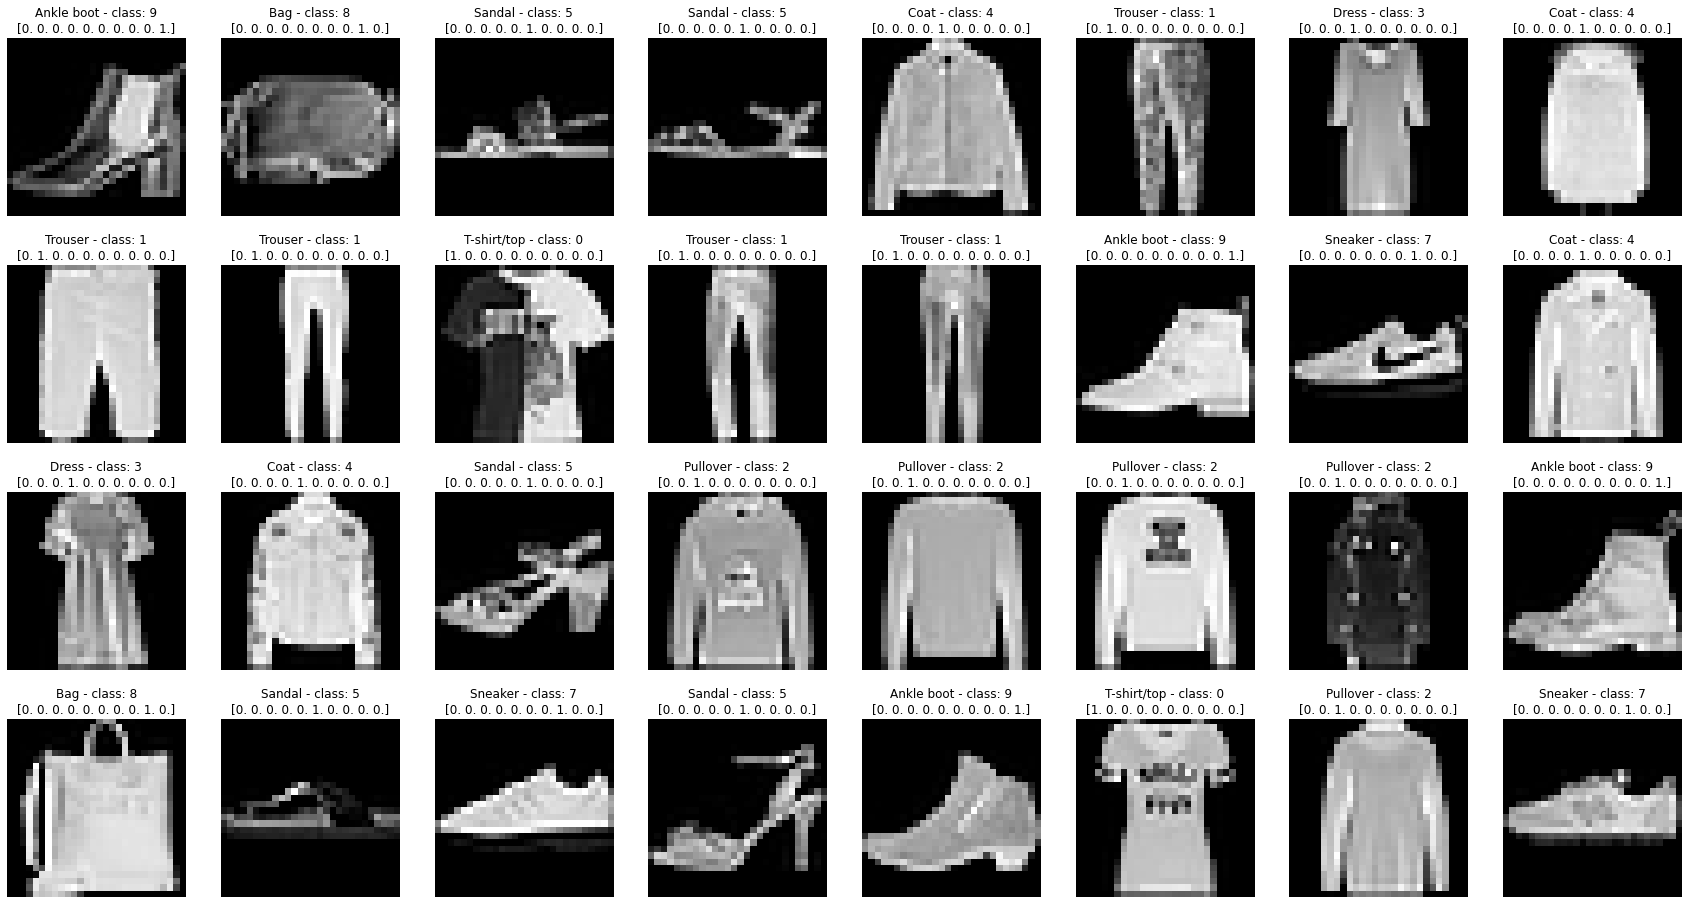

In [14]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

In [15]:
output_size = 10
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))
model_single_layer.add(Dense(output_size, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Salida (Dense)              (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow import keras
lr = 0.000001 
SGD = tensorflow.keras.optimizers.SGD(lr=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

C:\Users\marti\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [17]:
batch_size = 512
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=20, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

Epoch 1/20
106/106 [==============================] - 1s 4ms/step - loss: 2.4329 - accuracy: 0.0715 - val_loss: 2.4342 - val_accuracy: 0.0688
Epoch 2/20
106/106 [==============================] - 0s 2ms/step - loss: 2.4324 - accuracy: 0.0716 - val_loss: 2.4336 - val_accuracy: 0.0683
Epoch 3/20
106/106 [==============================] - 0s 3ms/step - loss: 2.4319 - accuracy: 0.0717 - val_loss: 2.4331 - val_accuracy: 0.0682
Epoch 4/20
106/106 [==============================] - 0s 2ms/step - loss: 2.4313 - accuracy: 0.0717 - val_loss: 2.4326 - val_accuracy: 0.0683
Epoch 5/20
106/106 [==============================] - 0s 2ms/step - loss: 2.4308 - accuracy: 0.0716 - val_loss: 2.4320 - val_accuracy: 0.0683
Epoch 6/20
106/106 [==============================] - 0s 3ms/step - loss: 2.4303 - accuracy: 0.0717 - val_loss: 2.4315 - val_accuracy: 0.0682
Epoch 7/20
106/106 [==============================] - 0s 3ms/step - loss: 2.4298 - accuracy: 0.0716 - val_loss: 2.4310 - val_accuracy: 0.0683
Epoch 

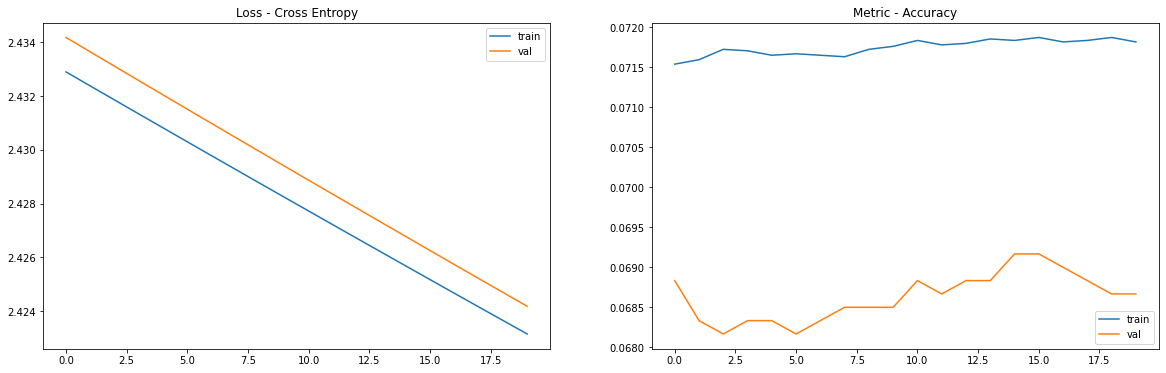

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [19]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.06866666674613953 2.4241867065429688


In [20]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_single_layer.predict(x_test)
print(test_prediction.shape)

(10000, 10)


In [21]:

# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[9 9 2 ... 5 5 9]


In [22]:
from keras.callbacks import EarlyStopping

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])





model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience= 5,
                                   restore_best_weights=True)


history = model.fit(x_train, 
                       y_train_categorical,
                    validation_data = (x_valid, y_val_categorical),
                    callbacks=[es],
                    epochs=50, 
                    batch_size= 64,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/50
675/675 [==============================] - 3s 3ms/step - loss: 0.6705 - accuracy: 0.7511 - val_loss: 0.4567 - val_accuracy: 0.8279
Epoch 2/50
675/675 [==============================] - 2s 3ms/step - loss: 0.4641 - accuracy: 0.8324 - val_loss: 0.4323 - val_accuracy: 0.8351
Epoch 3/50
675/675 [==============================] - 2s 3ms/step - loss: 0.4247 - accuracy: 0.8462 - val_loss: 0.3806 - val_accuracy: 0.8614
Epoch 4/50
675/675 [==============================] - 2s 3ms/step - loss: 0.3981 - accuracy: 0.8562 - val_loss: 0.3804 - val_accuracy: 0.8584
Epoch 5/50
675/675 [==============================] - 2s 3ms/step - loss: 0.3838 - accuracy: 0.8620 - val_loss: 0.3802 - val_accuracy: 0.8586
Epoch 6/50
675/675 [==============================] - 2s 3ms/step - loss: 0.3725 - accuracy: 0.8642 - val_loss: 0.3570 - val_accuracy: 0.8723
Epoch 7/50
675/675 [==============================] - 2s 3ms/step - loss: 0.3573 - accuracy: 0.8705 - val_loss: 0.3463 - val_accuracy: 0.8745
Epoch 

In [36]:
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 16
neuron_hidden_layer_2 = 8
output_neurons = 10


model_final = Sequential()
model_final.add(Flatten(input_shape=(28, 28)))
model_final.add(Dense(units=neuron_hidden_layer_1, kernel_initializer = 'normal', activation='tanh'))
model_final.add(Dropout(0.1))
model_final.add(Dense(units=neuron_hidden_layer_2,kernel_initializer = 'normal', activation='tanh'))
model_final.add(Dropout(0.1))
model_final.add(Dense(units=output_neurons,activation='softmax'))


# summary of the neural network model
model_final.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 16)                12560     
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 10)                90        
                                                                 
Total params: 12,786
Trainable params: 12,786
Non-trai

In [37]:
learn_rate = 0.001
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
model_final.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model_history = model_final.fit(x_train, y_train_categorical, validation_data=(x_valid, y_val_categorical), epochs= 50,batch_size = 50)

Epoch 1/50
1080/1080 [==============================] - 2s 2ms/step - loss: 1.0096 - accuracy: 0.6900 - val_loss: 0.5861 - val_accuracy: 0.8228
Epoch 2/50
1080/1080 [==============================] - 2s 2ms/step - loss: 0.6007 - accuracy: 0.8034 - val_loss: 0.4803 - val_accuracy: 0.8382
Epoch 3/50
1080/1080 [==============================] - 2s 2ms/step - loss: 0.5394 - accuracy: 0.8179 - val_loss: 0.4713 - val_accuracy: 0.8388
Epoch 4/50
1080/1080 [==============================] - 2s 2ms/step - loss: 0.5098 - accuracy: 0.8273 - val_loss: 0.4264 - val_accuracy: 0.8563
Epoch 5/50
1080/1080 [==============================] - 2s 2ms/step - loss: 0.4934 - accuracy: 0.8305 - val_loss: 0.4212 - val_accuracy: 0.8525
Epoch 6/50
1080/1080 [==============================] - 2s 2ms/step - loss: 0.4794 - accuracy: 0.8362 - val_loss: 0.4096 - val_accuracy: 0.8572
Epoch 7/50
1080/1080 [==============================] - 2s 2ms/step - loss: 0.4723 - accuracy: 0.8385 - val_loss: 0.4012 - val_accuracy:

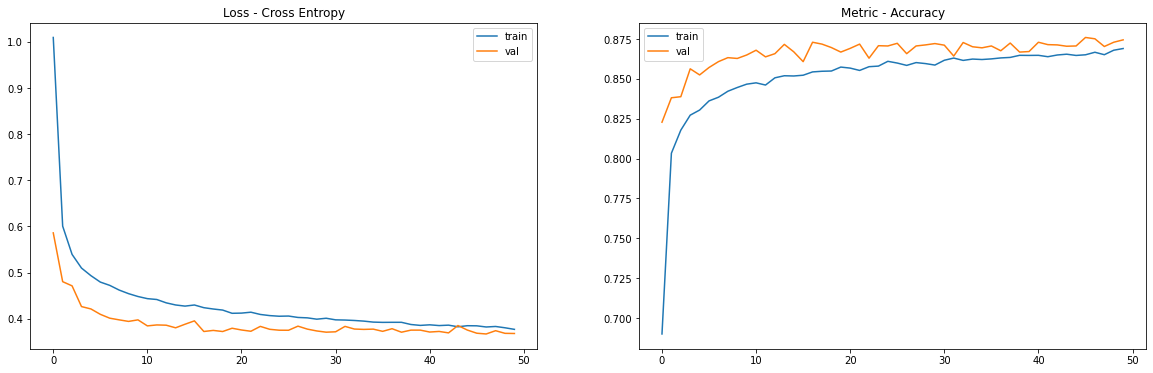

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_final.history.history['loss'], label='train')
ax1.plot(model_final.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_final.history.history['accuracy'], label='train')
ax2.plot(model_final.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

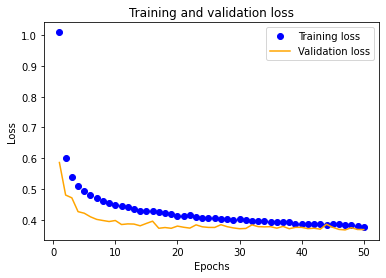

In [44]:


history_dict = model_history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

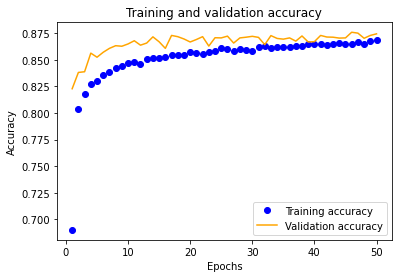

0.8759999871253967

In [45]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']


epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training accuracy')

plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


np.max(val_acc)

In [46]:
loss, acc = model_final.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.8744999766349792 0.3680334985256195


In [47]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model.predict(x_test)
print(test_prediction.shape)
# Calculo clase
test_labels2 = np.argmax(test_prediction, axis = 1)
print(test_labels)

(10000, 10)
[9 9 2 ... 5 5 9]


# Armo CSV para submitear

In [48]:
import pandas
df2 = pandas.DataFrame(data={"Category": test_labels2}).astype(int)
df2.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')

In [49]:
df2

,Category
0,3
1,2
2,7
3,4
4,6
...,...
9995,3
9996,5
9997,2
9998,3


In [ ]:
#https://github.com/ChaithanyaVamshi/Fashion-MNIST-Clothing-Image-Classification-Deeplearning/blob/main/Fashion_MNIST_Image_Classification.ipynb